<a href="https://colab.research.google.com/github/EduardoMoraesRitter/deep-learning-tensorflow-python/blob/main/3_Regressao_aluguel_bike_perceptron_DL_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

### prever o uso da bicicleta

- Base de dados:
  - Input (X): Temperatura, Umidade, Data, hora, Estacao, Clima, Vento, Velocidade, Feriado
  - Output (Y): cnt (casual + registrado)

Solução fazer um regressao com rede neural, com algumas camadas.
regressao é a prever ou encontrar uma relacao(modelo) entre a variavel dependente Y baseados na variavel independente X, trasando uma RETA 

(Y = X*m + b) o objetivo é encontrar os dois parametros ou coeficiente de "m" e "b"

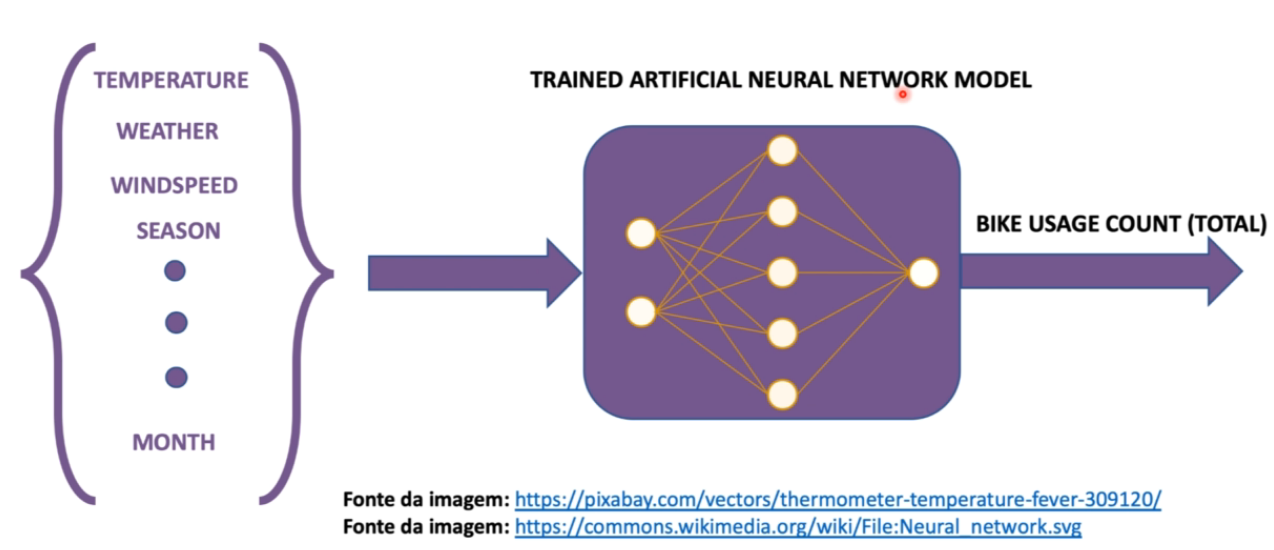

# rede neurais
encontrar o melhor conjunto de pesos para os dados e a saida

output = input * w1 + B
Y = X1 * w1 + B
Y = E(X1 * w1 + B

*   Y - saida ou valor resultante
*   X - cada parametro dos valores
*   w = peso para cada parametro (objetivo da rede é encontrar esse peso)
*   B = bias somado no final (objetivo da rede é encontrar esse peso)


## como é um neuronio

*   Coleta os sinais(inputs) pela entrada(dentritos)
*   Procesa a informacao no núcleo
*   Gera uma valor(output) pela saida(axônio)

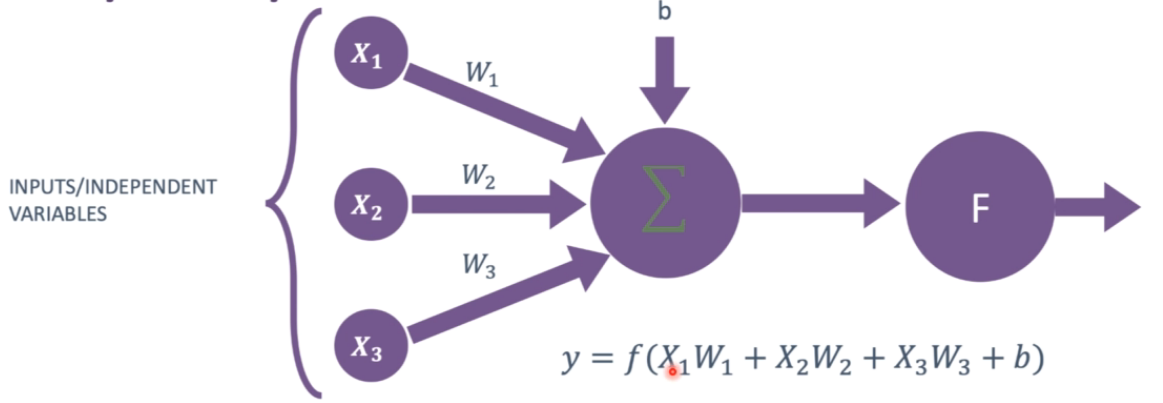


# Funções de ativação

## Unit Step
mapear entrada entre 0 ou 1, é um IF.


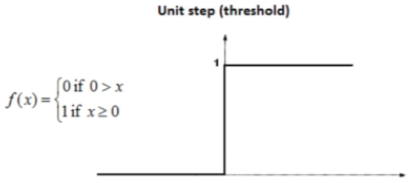

## SIGMOIDE
recebe valor e retorna entre 0 e 1, numero negativo vira 0, numerro positivo vira 1. usado na camada de saida, em geral.

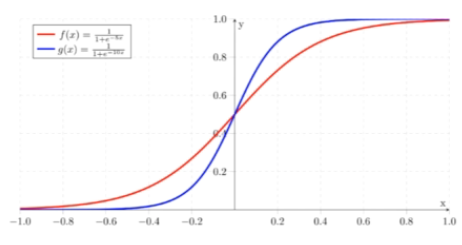

## RELU (rectified linear units)
um if(nao calculos então é eficiente), se valor entrada x < 0 = 0, senao x > 0 = x.

ela nao satura, evitando problema de gradiente desaparecendo.

usada na camada escondida

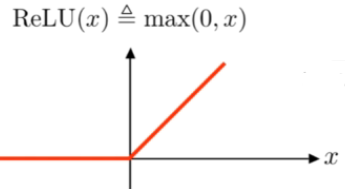

## TANH (Hyperbolic Tangent)

Tanh é parecida com a sigmod, porem converte numero entre -1 e 1.

Como a faixa de valor é pequeno, tem problema com o gradiente desparecendo.

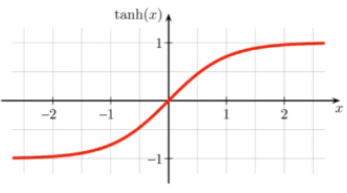

# MULTI-LAYER PERCEPTRON (Multicamada)

multiplicaçao de matrizes
quando mais camadas mais profunda(DEEP)
cada NODE é um neuronio.

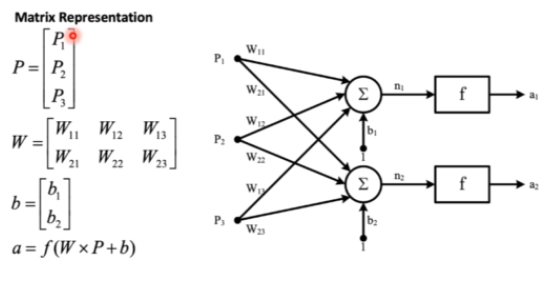

##Epocas

apreendizagem supervisionada trabalhar con dado que ja sei o resultado.
comparando as repostas da Rede(Y) com as respostas Reais(y).


*   a cada treinamento calculase o ERRO = Y - y.
*   calculando a funcao de custo, C = 1/2(Y - y)². 
*   atualizando os pesos por varias epocas ate melhorar o desempenho da rede.
*   medir o MEAN SQUARE ERROR


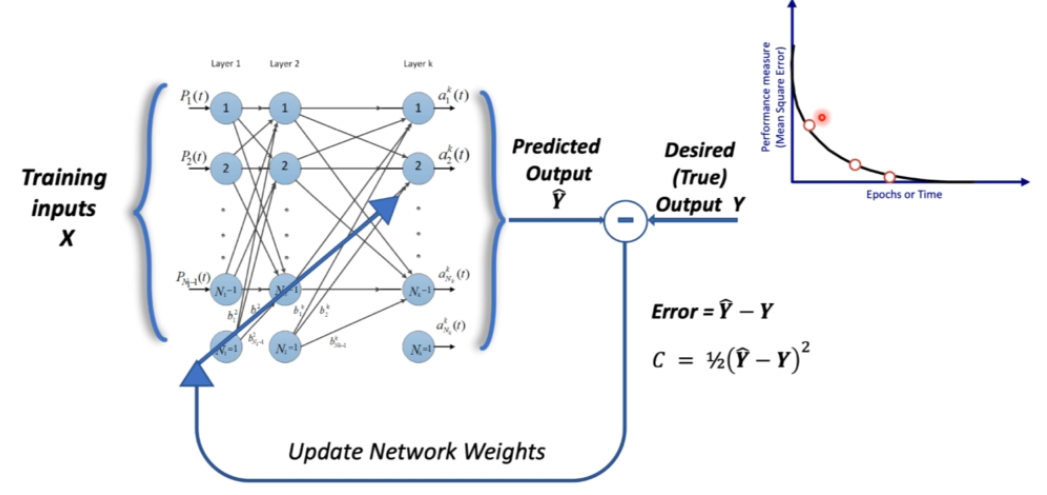

## Treinamento e Teste
geralmente dividido em 3 partes, de acordo com a qtd de dados

*   50% treinamento, para calcular o gradiente e ajuste de pesos
*   25% valiação, verificar qualidade durente o treinamento, validacao cruzada evita o overfitting 
*   25% teste, numca vista pelo modelo, e serve para testar o modelo final.

o valor MSE(mean squared error) tem ser pequeno na validacao e no teste.

## Ajuste dos Pesos(Descida do Gradiente)
um algoritimo para otimizar os valores dos pesos e bies.

Minimizar a funcao de custo(erro), o erro temque ser pequeno ao final do treinamento, calculando o gradiente da funcao de custo ate que o minimo local e gloval seja atindido.

## Taxa de aprendizagem
o tamanho dos passos para atualizar os valores.

*   0,01 pode ir rapido, porem passar do ponto
*   0,0000001 pode acerta o ponto, porem demora muito

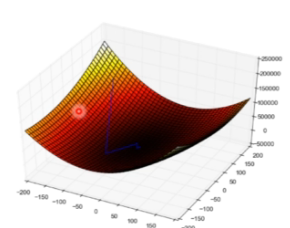

## Calculo da Derivada(gradiente)


1.   Diretação para onde vai se move é feito um calculo matematico que indica a derivada parcial da função de erro(loss function)
2.   Seleciona valores Randômicos para o valor m(peso) e b(bies).
3.   Calcula o quanto os valores vao ser alterados, Step size = slope * learning rate
4.   Atualiza os parametros e repete(epoca).

assim encontramos os melhores parametros para m,b.

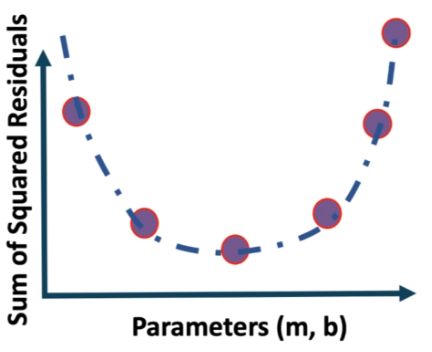


## back propagation
metodo para treinar a rede pelo resutado do calculo do gradiente.

ajuste do pesos do neuronio, baseado na funcao de erro(loss function)

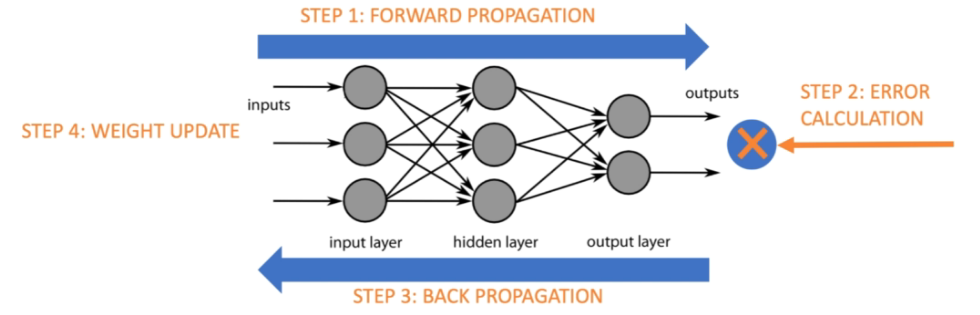

# BIAS e VARIÂNCIA e OVERFIT

variancia mede a direfença entre dado de treino e teste

modelo de regressao linear
*   alto bias pq é rigido, uma reta, nao se ajusta aos dados
*   pequena variancia, se adapta similar, generalizando os dados 
*   evita o overfiting
*   desempenho consistente


modelo de regreção polinomial
*   baixo bies, flexivel se encaixa nos dados
*   grande variancia, decora os dados de treino não entende dados de teste
*   causando overfiting 
*   desempenho variavel

**MODELO IDEAL, deve ter o menor bias com o menor variancia possivel.**
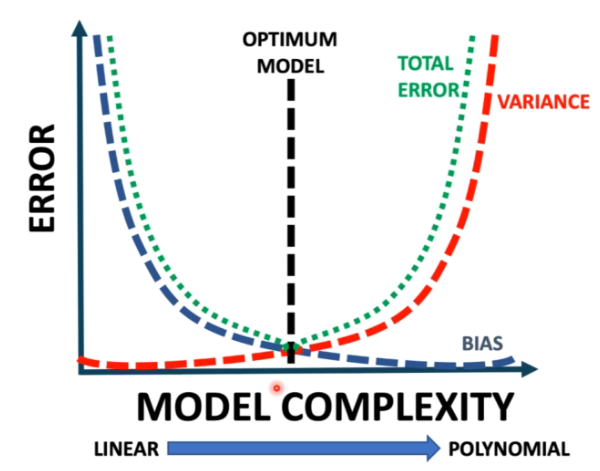

# Avaliar o Modelo
metricas para avaliação, comparando a previsao(Y) com valor real(y).

residual(erro) = Y - y

### MAE mean absolute error
calcular o erro medio, nao podemos ter valor negatico, senao 0 é previsao perfeito.

### MSE mean square error
mesmo calculo elevando ao quandrado² e nao tira o absoluto, assim remove o valor negativo de qualquer forma. os erros são penalizados(em dobro)

### RMSE root mean square error
a mesma formula anterior com raiz quadrada, assim representa o desvio padrao dos residuos, quanto residuos estão dispersos.

### MAPE mean absolute percentage error
colocar o erro em porcentagem assim evita numero gigantes. pode dar erro de divisao por 0.

### R Square(R²) - coeficiente de determinação
Calculo estatico mais consistente, indica a qualidade do modelo e quão bem os dados serao previsto pelo modelo. quanto mais proximo de 1.0 melhor

proporção da variancia da variavel dependente(y) o quanto é explicada pela variavel independente(x), quanto uma variavel afeta(explica) o valor da outra, R² = 80 ou 80% do valor de y é baseado no valor de x.

### R Square(R²) Ajustado
versão modificada que adiciona numero de previsores.
quando tem outras variaveis no X, pode ter uma penalidade e diminuir esse valor, se as variaveis adicionais atrapalham ou não melhoram o modelo.
ou ao contrario se as variaves forem significantes.

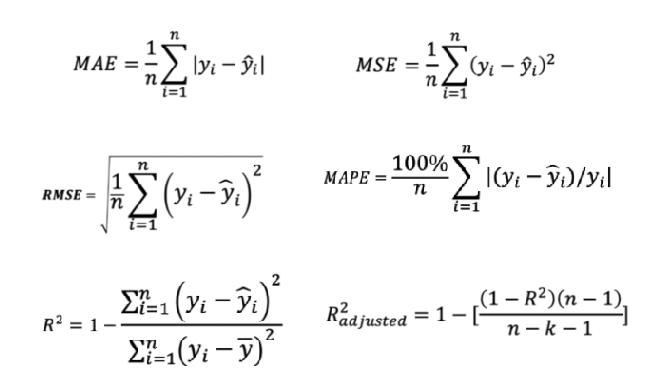

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

# Etapa 2: Importação da base de dados


In [15]:
# Leitura do arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/deep-learning-tensorflow-python/main/data/bike-sharing-daily.csv')
#remover o indece
df.reset_index(drop=True, inplace=True)
# Visualização de todos os registros
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


# Etapa 3: limpeza da base de dados


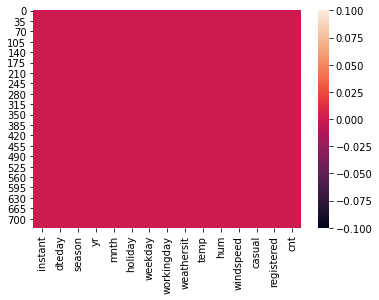

In [8]:
#visualizar dados nulos, nao tem nenhum faltando
sns.heatmap(df.isnull());

In [16]:
#excluir colunas
df = df.drop(labels=['instant', 'casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [18]:
#converter para um formato de data, para o erro time data '1/1/2011' does not match format '%m/%d/$Y' (match) ultilize infer_datetime_format
df.dteday = pd.to_datetime(df.dteday, format='%m/%d/$Y', infer_datetime_format=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [19]:
#colocar como indice a coluna data, para pesquisa
df.index = pd.DatetimeIndex(df.dteday)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [20]:
df = df.drop(labels=['dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# Etapa 4: visualizacao da base de dados

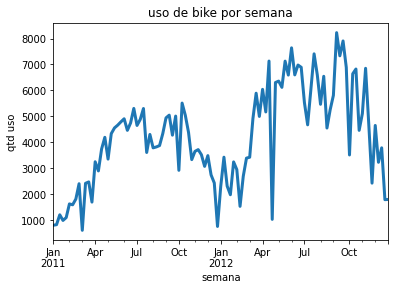

In [26]:
#grafico do uso de bike(cnt) de agrupamento a frequencia(asfreq) por semana(w), so da pra fazer pq o index é a data
df['cnt'].asfreq('w').plot(linewidth = 3)
plt.title('uso de bike por semana')
plt.xlabel('semana')
plt.ylabel('qtd uso');

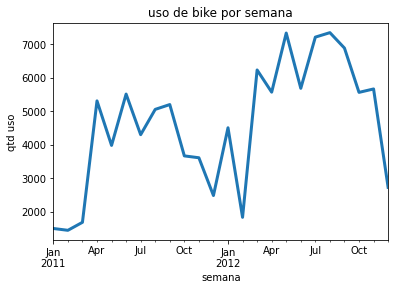

In [27]:
#agora por mes
df['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('uso de bike por semana')
plt.xlabel('semana')
plt.ylabel('qtd uso');

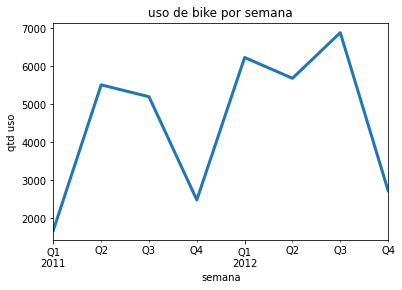

In [28]:
#quadrimestre
df['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('uso de bike por semana')
plt.xlabel('semana')
plt.ylabel('qtd uso');

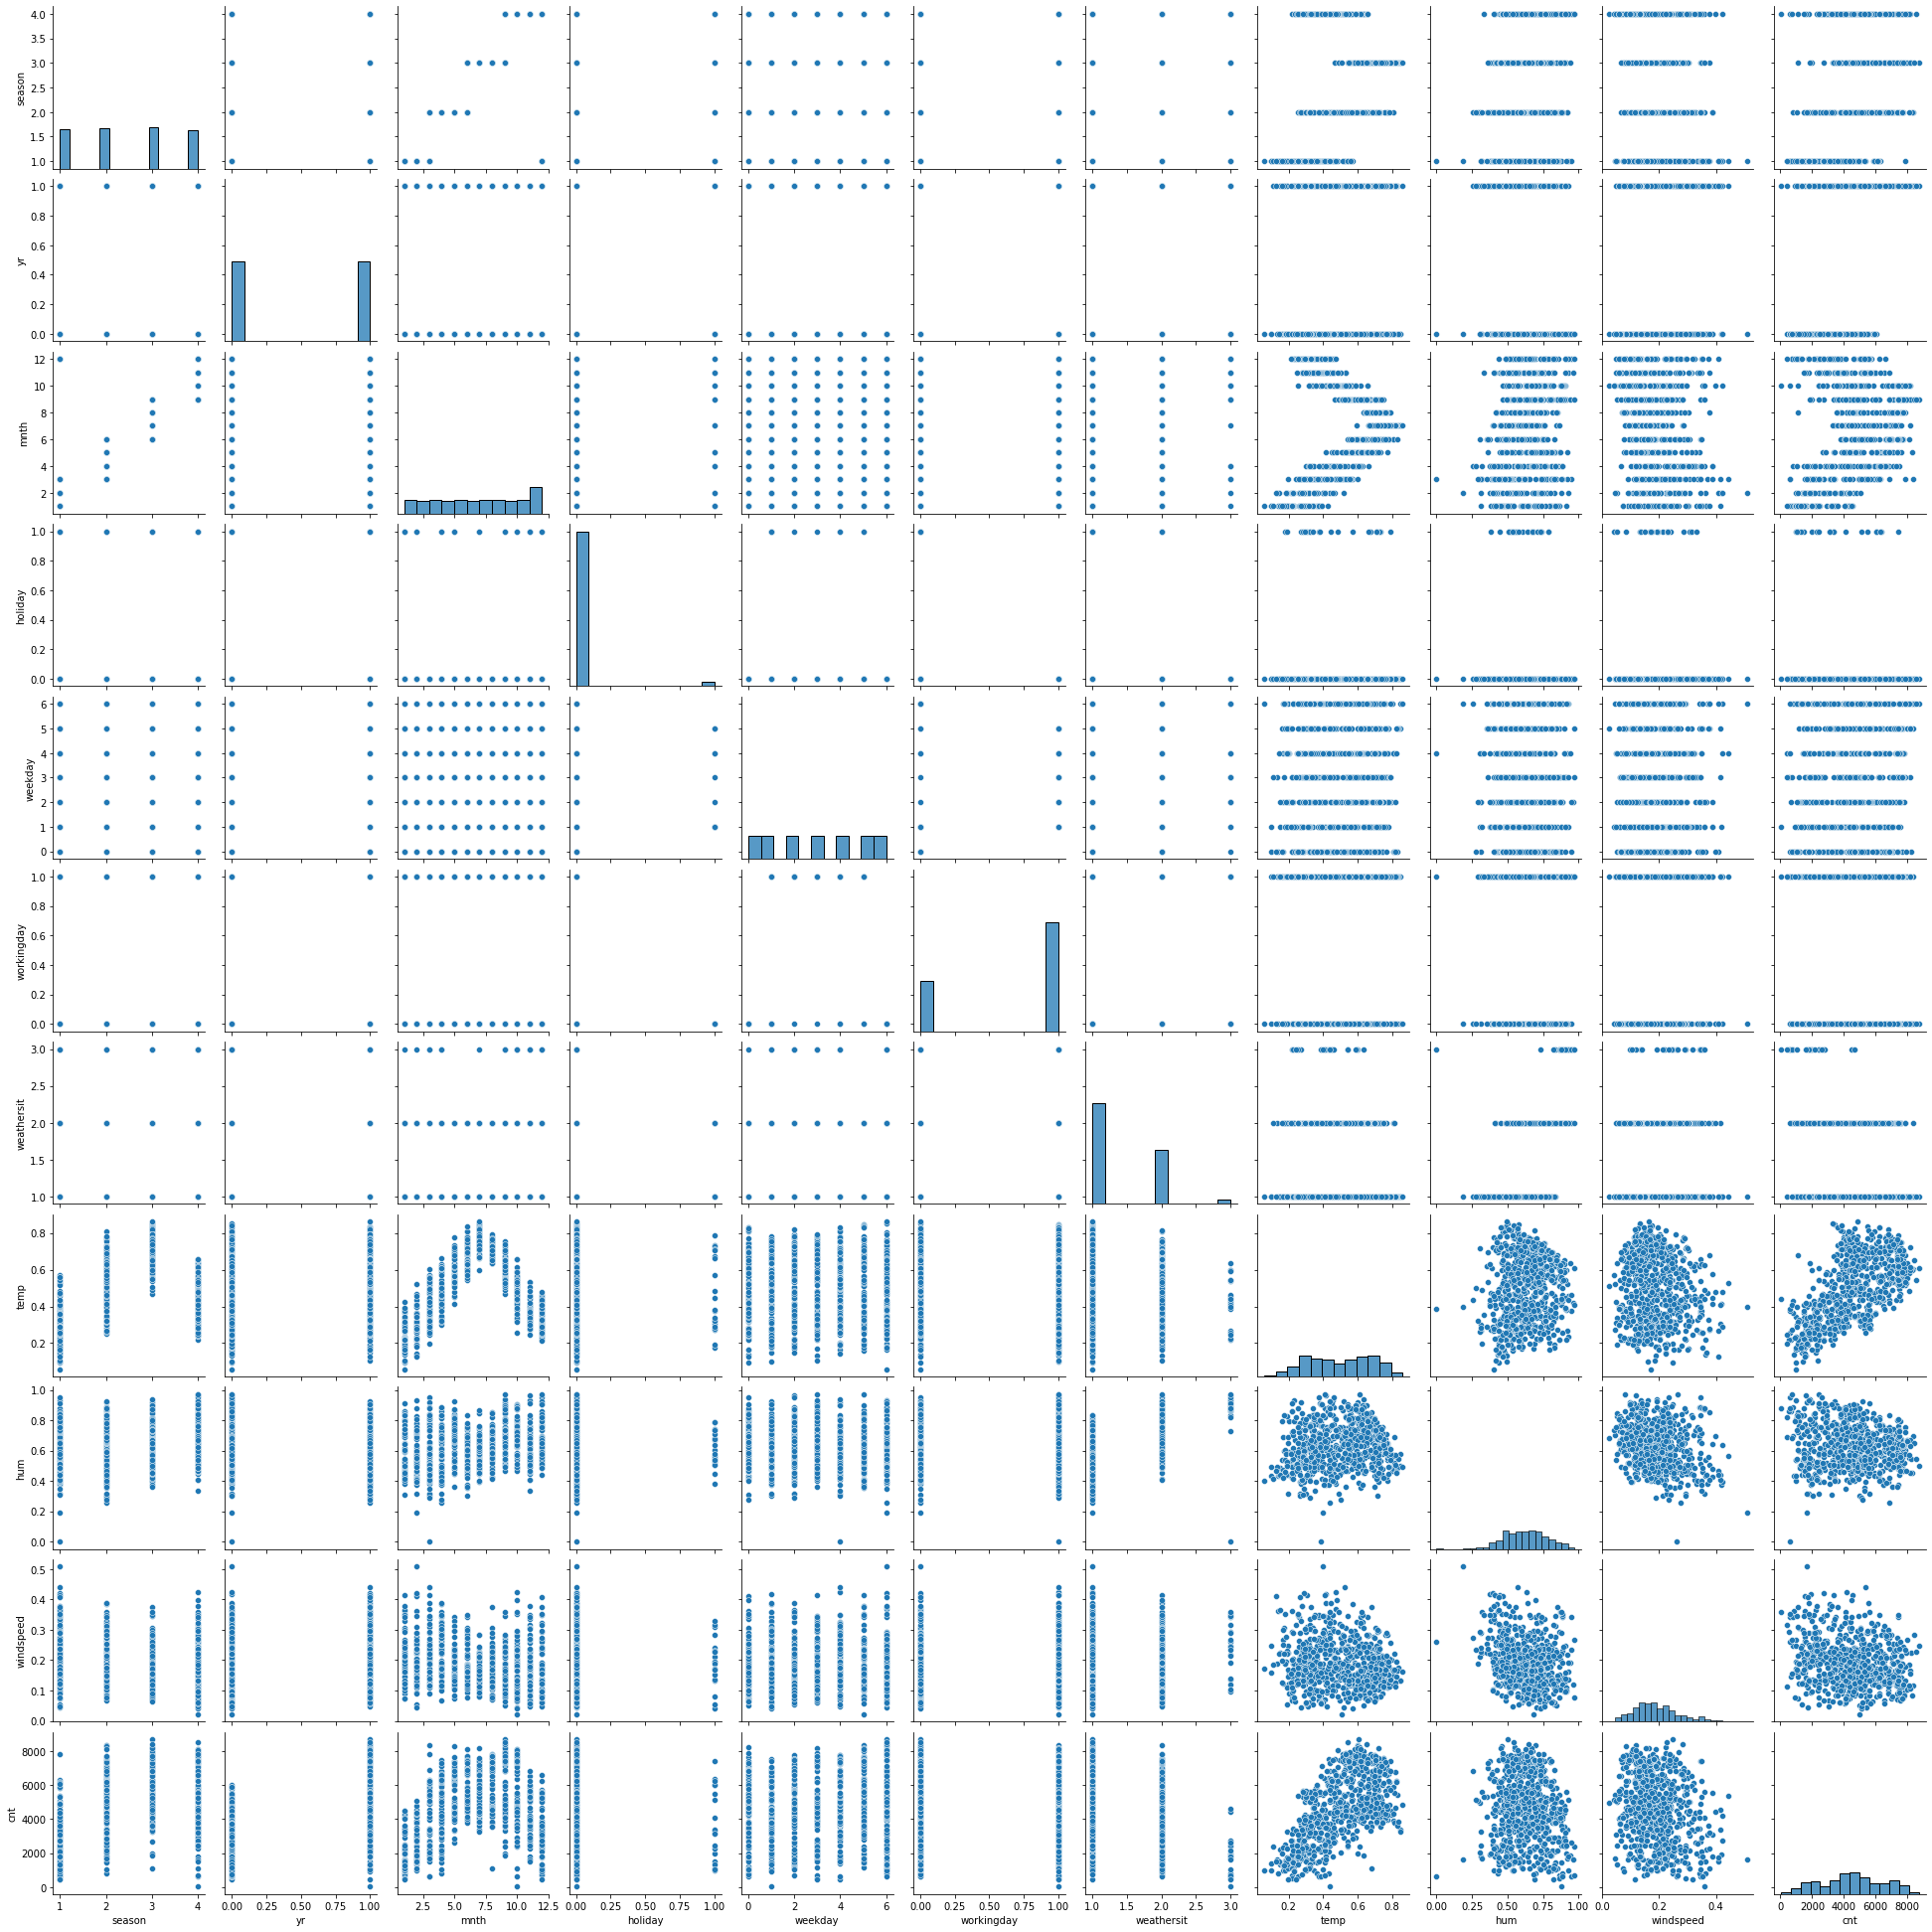

In [29]:
#matrix cruzando os dos atributos
sns.pairplot(df);

In [33]:
#data frame com dados numericos
x_numerico = df[['temp', 'hum', 'windspeed', 'cnt']]
x_numerico

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


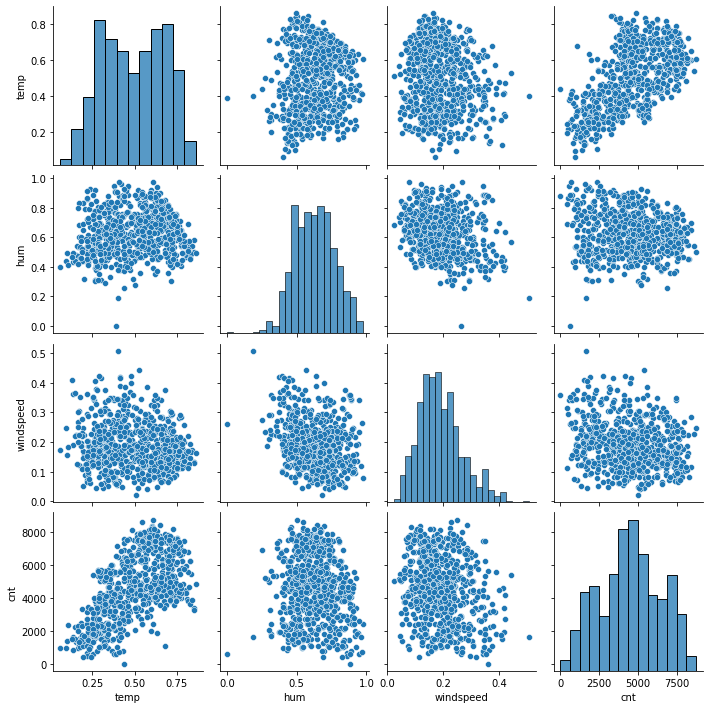

In [34]:
#matrix com histograma
sns.pairplot(x_numerico);

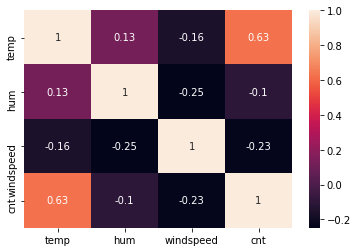

In [35]:
#mapa de calor matrix de correlacao, os valores é o anote
sns.heatmap(x_numerico.corr(), annot=True)

# Etapa 5: Tratamento da base de dados

In [36]:
#dados categoricos
x_categoricos = df[['season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit']]
x_categoricos.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [37]:
#dummy (one hot encoder) trasformar linha em colunar
#exemplo weekday dia da semana, para cada dia colocar uma coluna com valor 0 ou 1
#se deixar domingo=0 ate sabado=6 o algoritmo entende o valor como grandeza de importancia

from sklearn.preprocessing import OneHotEncoder
onehotenconder = OneHotEncoder()
x_categoricos = onehotenconder.fit_transform(x_categoricos).toarray()
#formato numpy ndarray
print(x_categoricos)
#temos 32 atributos ou colunas
print(x_categoricos.shape)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [40]:
#converter para dataframe
x_categoricos = pd.DataFrame(x_categoricos)
x_categoricos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
#remover o indece do dataframe numerico
x_numerico = x_numerico.reset_index()
x_numerico.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [44]:
#concatenar os data frame, o axis=1 para colucar uma coluna do lado la outra
df = pd.concat([x_categoricos, x_numerico], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [46]:
#remover coluna data
df = df.drop(labels=['dteday'], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [50]:
#separar as variaveis X, o -1 é para mular a ultima coluna
X = df.iloc[:, :-1].values
X.shape

(731, 35)

In [51]:
#pegar Y a variavel target
Y = df.iloc[:, -1:].values
Y.shape

(731, 1)

In [ ]:
#colocar o valor em escala de 0 e 1, assim o processamento da RN é mas rapida
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(Y)
print(Y)

In [54]:
#dividir base de treino e teste(20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(584, 35)
(147, 35)


# Etapa 6: Construir o modelo

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear')) #saida da RN uma unica saida linear

#visualizar a arquitetura da rede
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [59]:
#compilar o modelo
#com o otimizador Adam para tipo de problema de regrassao é o melhor, melhoria do gradiente decendete classico
#funcao de erro(loss) usamos MSE
model.compile(optimizer='Adam', loss='mean_squared_error')

In [60]:
#treinar com todos os dados 25 vezes(epocas)
#fazer o calculo do erro(batch) em 50 em 50 registros(584/50 = 11) a cada epoca vai calcular e ajustar os pesos 11 vezes
#validacao com 20% 116 registro(que nao viu) seram ultilizado para validar
epochs_hist = model.fit(x_train, y_train, epochs=25, batch_size=50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 62ms/step - loss: 0.1211 - val_loss: 0.0465
Epoch 2/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0318 - val_loss: 0.0219
Epoch 3/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0190 - val_loss: 0.0190
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.0133
Epoch 5/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0123
Epoch 6/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.0114
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0114
Epoch 8/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0066 - val_loss: 0.0111
Epoch 9/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0108
Epoch 10/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0108
Epoch 11/25
10/1

# Etapa 7: Avaliar o modelo

In [61]:
#valor de erro no treinamento e na validacao
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

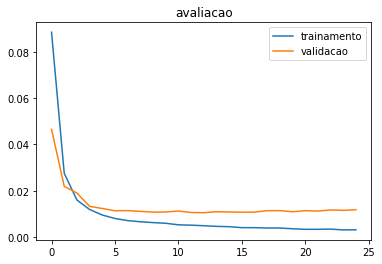

In [65]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.legend(['trainamento', 'validacao'])
plt.title('avaliacao');

In [ ]:
#previsao com dados de teste
y_predict = model.predict(x_test)
y_predict

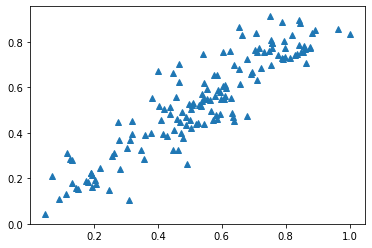

In [67]:
#comparar os resultado, quanto melhor a reta mas correto foi o modelo
plt.plot(y_test, y_predict, "^");

In [68]:
#escala original
y_predict_escala = scaler.inverse_transform(y_predict)
y_test_escala = scaler.inverse_transform(y_test)

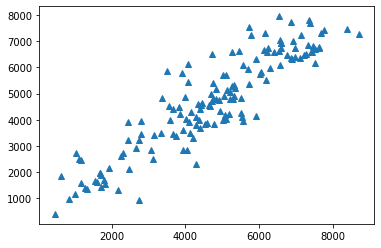

In [69]:
plt.plot(y_test_escala, y_predict_escala, "^");

In [70]:
#quantos atributos ou colunas
k = x_test.shape[1]
k

35

In [71]:
#numero de registros
n = len(x_test)
n

147

In [72]:
#calculo da metricas de erro
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [73]:
mae = mean_absolute_error(y_test_escala, y_predict_escala)
mse = mean_squared_error(y_test_escala, y_predict_escala)
rmse = sqrt(mse)
r2 = r2_score(y_test_escala, y_predict_escala)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [74]:
#r2 indica que 76% das variacoes da saida estao relacionado com os atributos
#como o r2 ajustado foi masis baixo, alguns desses atributos nao contribui para o modelo
print("mae: ", mae)
print("mse: ", mse)
print("rmse: ", rmse)
print("r2: ", r2)
print("adj_r2: ", adj_r2)

mae:  625.5836933161937
mse:  663069.1510980955
rmse:  814.2905814867905
r2:  0.8196994366879289
adj_r2:  0.7628479077156542


In [ ]:
#para melhorar podemos usar tecnicas de selecao de atributos, para saber quais são mais importantes